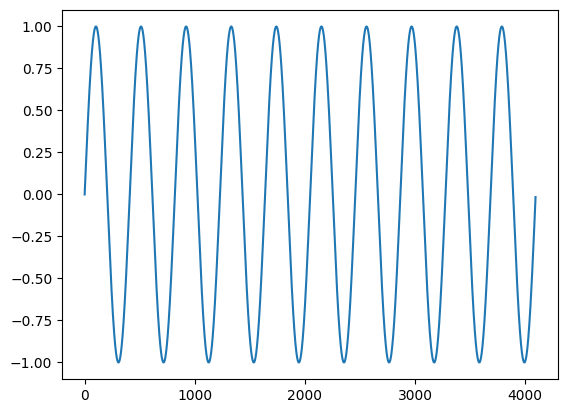

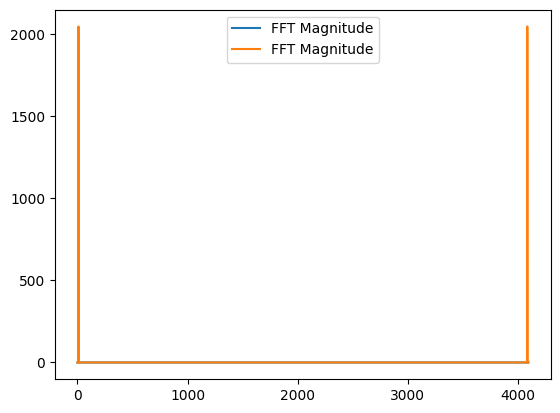

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#load sinewave.dat

#load the first 4096 values
data = np.loadtxt('sinewave.dat', delimiter=',', dtype=float)
fft_data =np.loadtxt('sinewave_fft.dat', delimiter=',', dtype=float)
plt.figure()
plt.plot(data, label='Sine Wave')
plt.figure()
plt.plot(np.abs(fft_data), label='FFT Magnitude')
plt.legend()

original 1/e^2 radius: 0.2392578125 mm
propagated 1/e^2 radius: 0.2802734375 mm
Integrated power 0.09047227468563139 mm^2
Integrated power 0.0904722755496022 mm^2
ratio 1.0000000095495645


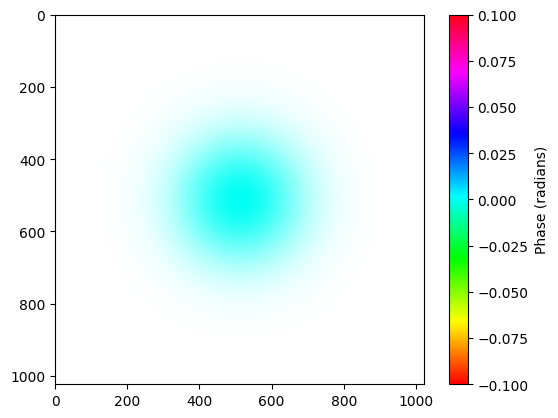

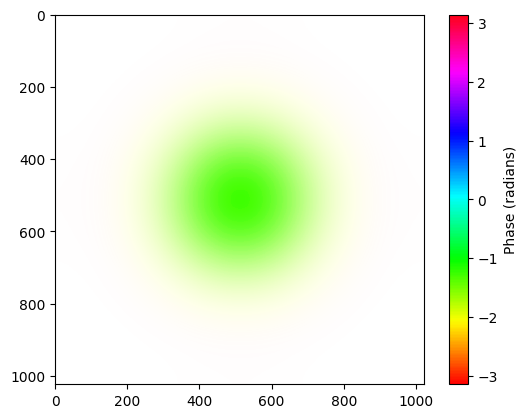

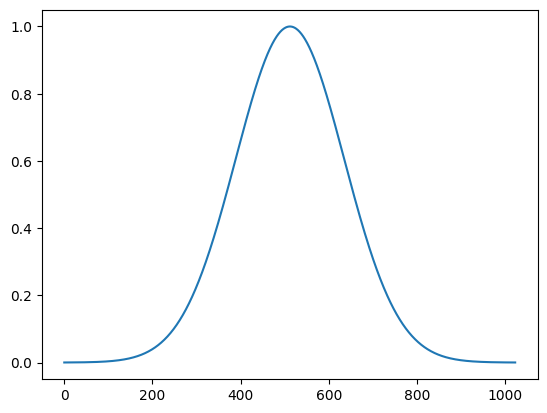

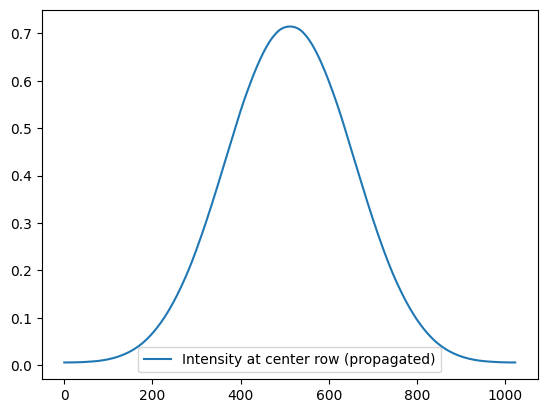

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#load sinewave.dat

#load the first 4096 values

def Plot_Field(optical_field):
    intensity = np.abs(optical_field)**2
    phase = np.angle(optical_field)

    #on one plot colour code based on the phase but brightness is determined by intesnity
    plt.figure()
    plt.imshow(phase, cmap='hsv', interpolation='nearest', alpha=intensity/np.max(intensity))
    plt.colorbar(label='Phase (radians)')
    # #turn off axis
    # plt.axis('off')






N = 1024
GRID_SIZE = 5
re_data = np.loadtxt('re_optical_field.dat', delimiter=',')
im_data = np.loadtxt('im_optical_field.dat', delimiter=',')
data = re_data + 1j * im_data
data = np.reshape(data, (N, N))
Plot_Field(data)


re_data = np.loadtxt('re_propagated_field.dat', delimiter=',')
im_data = np.loadtxt('im_propagated_field.dat', delimiter=',')

p_data = re_data + 1j * im_data
p_data = np.reshape(p_data, (N, N))
# print(p_data)
Plot_Field(p_data)


#plot centre cross sections of the intensity profile
plt.figure()
plt.plot(np.abs(data[N//2, :])**2, label='Intensity at center row')
plt.figure()
plt.plot(np.abs(p_data[N//2, :])**2, label='Intensity at center row (propagated)')
plt.legend()


#compute the 1/e^2 radius

def compute_centre_esquare_radius(data):
    # Compute the intensity profile
    data = data[N//2, :]  # Take the center row
    intensity = np.abs(data)**2

    # Find the maximum intensity
    max_intensity = np.max(intensity)

    # Find the radius where the intensity falls to 1/e^2 of the maximum
    centre = np.argmax(intensity)
    radius = np.argmin(intensity < max_intensity / np.e**2)
    delta_coord = radius - centre
    length = delta_coord / N * GRID_SIZE
    return length

print("original 1/e^2 radius:", np.abs(compute_centre_esquare_radius(data)), "mm")
print("propagated 1/e^2 radius:", np.abs(compute_centre_esquare_radius(p_data)), "mm")

print("Integrated power", np.sum(np.abs(data)**2)/N**2, "mm^2")
print("Integrated power", np.sum(np.abs(p_data)**2)/N**2, "mm^2")
print("ratio", np.sum(np.abs(p_data)**2) / np.sum(np.abs(data)**2))

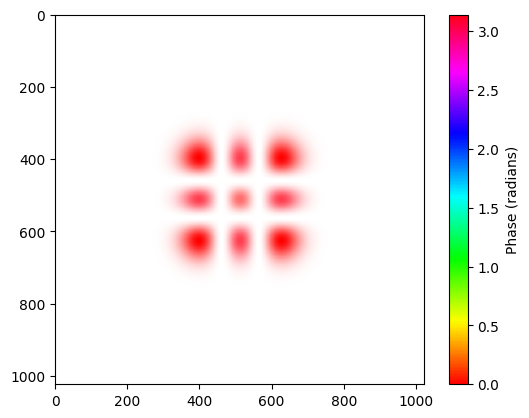

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def Plot_Field(optical_field):
    intensity = np.abs(optical_field)**2
    phase = np.angle(optical_field)

    #on one plot colour code based on the phase but brightness is determined by intesnity
    plt.figure()
    plt.imshow(phase, cmap='hsv', interpolation='nearest', alpha=intensity/np.max(intensity))
    plt.colorbar(label='Phase (radians)')
    # #turn off axis
    # plt.axis('off')

N = 1024
re_data = np.loadtxt('output_real.txt', delimiter=',')
im_data = np.loadtxt('output_imag.txt', delimiter=',')
data = re_data + 1j * im_data
data = np.reshape(data, (N, N))
Plot_Field(data)
